In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import countplot

In [2]:
ruta_accidentes_parquet = "datasets/AccidentesAviones.parquet.gz"

In [3]:
df_accidentes = pd.read_parquet(ruta_accidentes_parquet)

In [4]:
df_accidentes.head()

,Fecha,Año,Mes,Dia,Hora Declarada,Ruta,Ruta(información extra),Operadora,Número del Vuelo,Tipo de Aeronave,Registro,Número de Série,Total a Bordo,Pasajeros a Bordo,Tripulación a Bordo,Total de Fatalidades,Fatalidades de Pasajeros,Fatalidades de la Tripulación,Fatalidades en Solo,Resumen
0,1908-09-17,1908,9,17,17:18,"Fort Myer, Virginia",Demonstration,Military - U.S. Army,None,Wright Flyer III,None,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,1909,9,7,None,"Juvisy-sur-Orge, France",Air show,None,None,Wright Byplane,SC1,None,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,1912,7,12,06:30,"Atlantic City, New Jersey",Test flight,Military - U.S. Navy,None,Dirigible,None,None,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,1913,8,6,None,"Victoria, British Columbia, Canada",None,Private,None,Curtiss seaplane,None,None,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,1913-09-09,1913,9,9,18:30,Over the North Sea,None,Military - German Navy,None,Zeppelin L-1 (airship),None,None,20,None,None,14,None,None,0,The airship flew into a thunderstorm and encou...


Visualizaciones Específicas para Accidentes de Avión

visualización para mostrar la distribución de vítimas por categoria (passageiros, tripulação, terceiros)

<Figure size 1200x600 with 0 Axes>

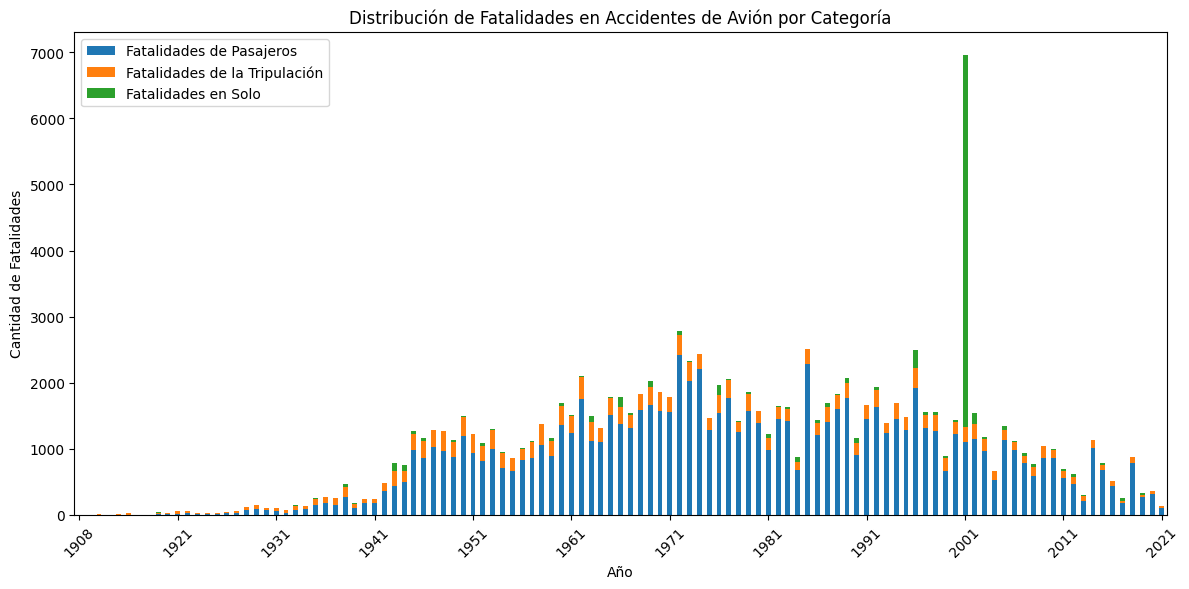

In [5]:
df_accidentes_copy = df_accidentes.copy()

# Reemplazar valores NaN con 0 en las columnas de fatalidades
df_accidentes_copy['Fatalidades de Pasajeros'].fillna(0, inplace=True)
df_accidentes_copy['Fatalidades de la Tripulación'].fillna(0, inplace=True)
df_accidentes_copy['Fatalidades en Solo'].fillna(0, inplace=True)

# Convertir las columnas de fatalidades a tipo numérico
df_accidentes_copy['Fatalidades de Pasajeros'] = df_accidentes_copy['Fatalidades de Pasajeros'].astype(int)
df_accidentes_copy['Fatalidades de la Tripulación'] = df_accidentes_copy['Fatalidades de la Tripulación'].astype(int)
df_accidentes_copy['Fatalidades en Solo'] = df_accidentes_copy['Fatalidades en Solo'].astype(int)

# Agrupar los datos por año y sumar las fatalidades en cada categoría
resumen_fatality = df_accidentes_copy.groupby('Año')[['Fatalidades de Pasajeros', 'Fatalidades de la Tripulación', 'Fatalidades en Solo']].sum()

# Crear un gráfico de barras apiladas con años en el eje x cada 10 años
plt.figure(figsize=(12, 6))
ax = resumen_fatality.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribución de Fatalidades en Accidentes de Avión por Categoría')
plt.xlabel('Año')
plt.ylabel('Cantidad de Fatalidades')

# Obtener los años del DataFrame original (sin agrupar)
years = df_accidentes_copy['Año'].unique()

# Establecer ubicaciones y etiquetas personalizadas para el eje x
plt.xticks(range(0, len(years), 10), years[::10], rotation=45)

plt.tight_layout()
plt.show()

In [6]:
datos_numericos = resumen_fatality.select_dtypes(include='number')
# Encuentra el año con la mayor fatalidad para cada tipo
max_pasajeros = resumen_fatality.idxmax()["Fatalidades de Pasajeros"]
max_tripulacion = resumen_fatality.idxmax()["Fatalidades de la Tripulación"]
max_terceros = resumen_fatality.idxmax()["Fatalidades en Solo"]

print("Año con mayor fatalidad para Pasajeros:", max_pasajeros)
print("Año con mayor fatalidad para Tripulación:", max_tripulacion)
print("Año con mayor fatalidad para Terceros:", max_terceros)

Año con mayor fatalidad para Pasajeros: 1972
Año con mayor fatalidad para Tripulación: 1962
Año con mayor fatalidad para Terceros: 2001


In [7]:

# Copia el DataFrame original
df_copy = df_accidentes.copy()

# Reemplazar valores None con 0 en la columna 'Fatalidades en Solo'
df_copy['Fatalidades en Solo'].fillna(0, inplace=True)

# Convierte la columna 'Fatalidades en Solo' a valores numéricos
df_copy['Fatalidades en Solo'] = pd.to_numeric(df_copy['Fatalidades en Solo'], errors='coerce')

# Encuentra el índice del valor máximo en la columna 'Fatalidades en Solo'
indice_maximo = df_copy['Fatalidades en Solo'].idxmax()

# Obtiene la fila correspondiente al índice máximo
fila_maximo = df_copy.loc[indice_maximo]

# Extrae el año, mes y valor máximo de 'Fatalidades en Solo'
año_maximo = fila_maximo['Año']
mes_maximo = fila_maximo['Mes']
dia_maximo = fila_maximo['Dia']
valor_maximo = fila_maximo['Fatalidades en Solo']

print("Valor máximo de Fatalidades en Solo:", valor_maximo)

print(f"El outlier de la columna de Fatalidades en Solo está en {dia_maximo}/{mes_maximo}/{año_maximo}")


Valor máximo de Fatalidades en Solo: 2750
El outlier de la columna de Fatalidades en Solo está en 11/9/2001


el outlier de fatalidades de terceros en el año de 2001, se trata del atentado de 11 de septiemtre de 2001

relación entre número de pasajeros a bordo y el número de víctimas

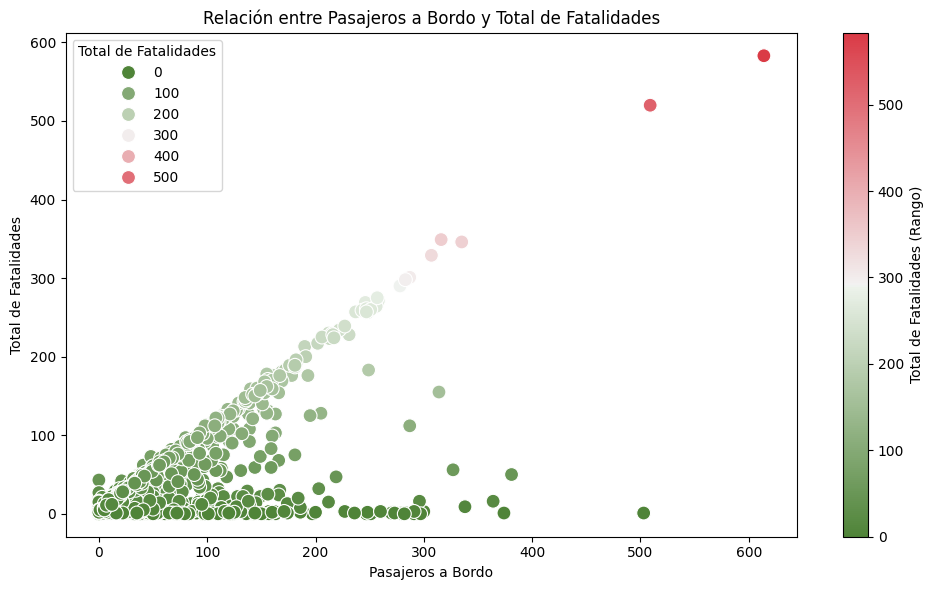

In [8]:
df_copy = df_accidentes.copy()
# Reemplazar los valores None en 'Total de Fatalidades' con 0
df_copy['Total de Fatalidades'] = df_copy['Total de Fatalidades'].fillna(0)

# Convierte la columna 'Total de Fatalidades' en tipo float
df_copy['Total de Fatalidades'] = pd.to_numeric(df_copy['Total de Fatalidades'], errors='coerce')

# Convierte la columna 'Pasajeros a Bordo' en tipo numérico
df_copy['Pasajeros a Bordo'] = pd.to_numeric(df_copy['Pasajeros a Bordo'], errors='coerce')

# Definir una paleta de colores personalizada (verde para el mínimo, rojo para el máximo)
cmap = sns.diverging_palette(120, 10, as_cmap=True)

# Crear un gráfico de dispersión para investigar la relación entre las dos variables
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df_copy, x='Pasajeros a Bordo', y='Total de Fatalidades', hue='Total de Fatalidades', palette=cmap, s=100)
plt.title('Relación entre Pasajeros a Bordo y Total de Fatalidades')
plt.xlabel('Pasajeros a Bordo')
plt.ylabel('Total de Fatalidades')

# Personalizar la leyenda con un rango de valores
color_map = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=df_copy['Total de Fatalidades'].min(), vmax=df_copy['Total de Fatalidades'].max()))
color_map.set_array([])
color_bar = plt.colorbar(color_map, ax=scatter, orientation='vertical', pad=0.05)
color_bar.set_label('Total de Fatalidades (Rango)')

# Establecer ticks personalizados en el eje x
plt.xticks(range(0, int(df_copy['Pasajeros a Bordo'].max()) + 1, 100))

plt.tight_layout()
plt.show()

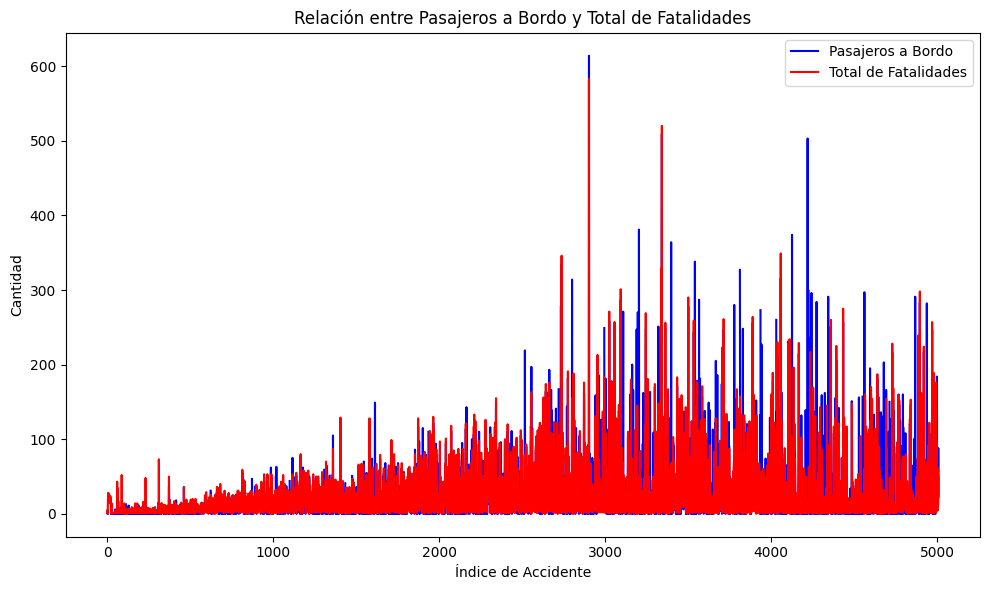

In [9]:

# Reemplazar los valores None en 'Total de Fatalidades' con 0
df_copy['Total de Fatalidades'] = df_copy['Total de Fatalidades'].fillna(0)

# Convierte la columna 'Total de Fatalidades' en tipo float
df_copy['Total de Fatalidades'] = pd.to_numeric(df_copy['Total de Fatalidades'], errors='coerce')

# Convierte la columna 'Pasajeros a Bordo' en tipo numérico
df_copy['Pasajeros a Bordo'] = pd.to_numeric(df_copy['Pasajeros a Bordo'], errors='coerce')

# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))

# Línea para Pasajeros a Bordo (azul)
plt.plot(df_copy['Pasajeros a Bordo'], label='Pasajeros a Bordo', color='blue')

# Línea para Total de Fatalidades (rojo)
plt.plot(df_copy['Total de Fatalidades'], label='Total de Fatalidades', color='red')

# Personalizar el gráfico
plt.title('Relación entre Pasajeros a Bordo y Total de Fatalidades')
plt.xlabel('Índice de Accidente')
plt.ylabel('Cantidad')
plt.legend()  # Mostrar leyenda

plt.tight_layout()
plt.show()

Análisis Temporal

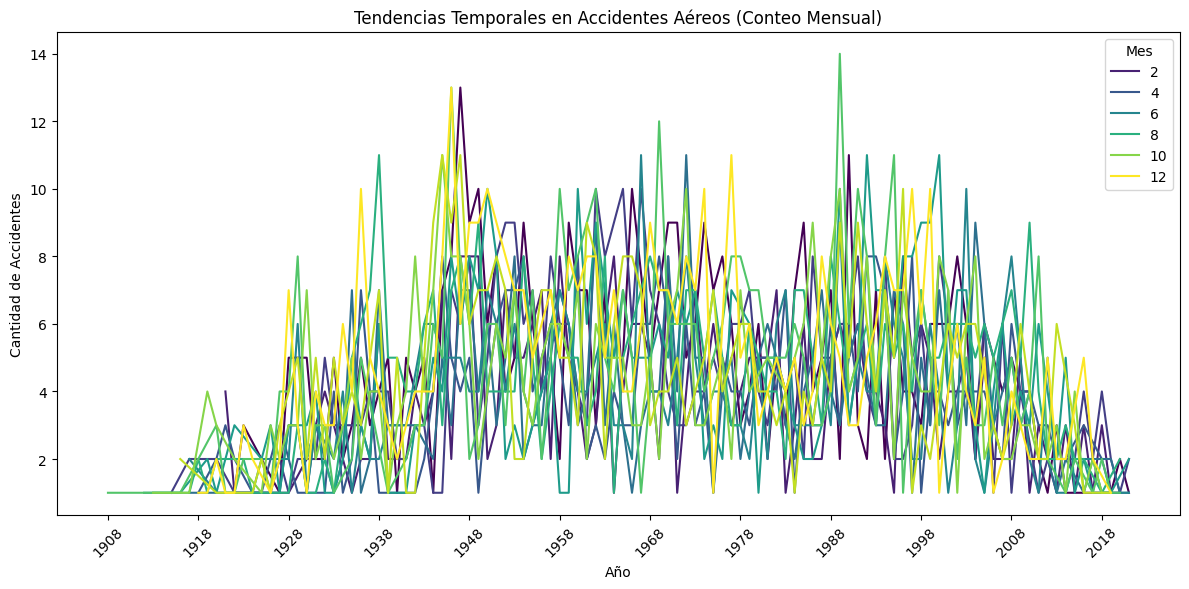

In [10]:

# Agrupa los datos por año y mes y cuenta el número de accidentes en cada grupo
tendencias_temporales = df_accidentes.groupby([df_accidentes['Año'], df_accidentes['Mes']]).size().reset_index(name='Cantidad de Accidentes')
tendencias_temporales.rename(columns={'Fecha': 'Año', 'Fecha.1': 'Mes'}, inplace=True)

# Crea un gráfico de línea para mostrar las tendencias temporales por año y mes
plt.figure(figsize=(12, 6))
sns.lineplot(data=tendencias_temporales, x='Año', y='Cantidad de Accidentes', hue='Mes', palette='viridis', markers=True, dashes=False)
plt.title('Tendencias Temporales en Accidentes Aéreos (Conteo Mensual)')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(ticks=range(tendencias_temporales['Año'].min(), tendencias_temporales['Año'].max() + 1, 10), rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_13940\3254711237.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=tendencias_anuales, x='Año', y='Cantidad de Accidentes', palette='viridis', markers=True, dashes=False)


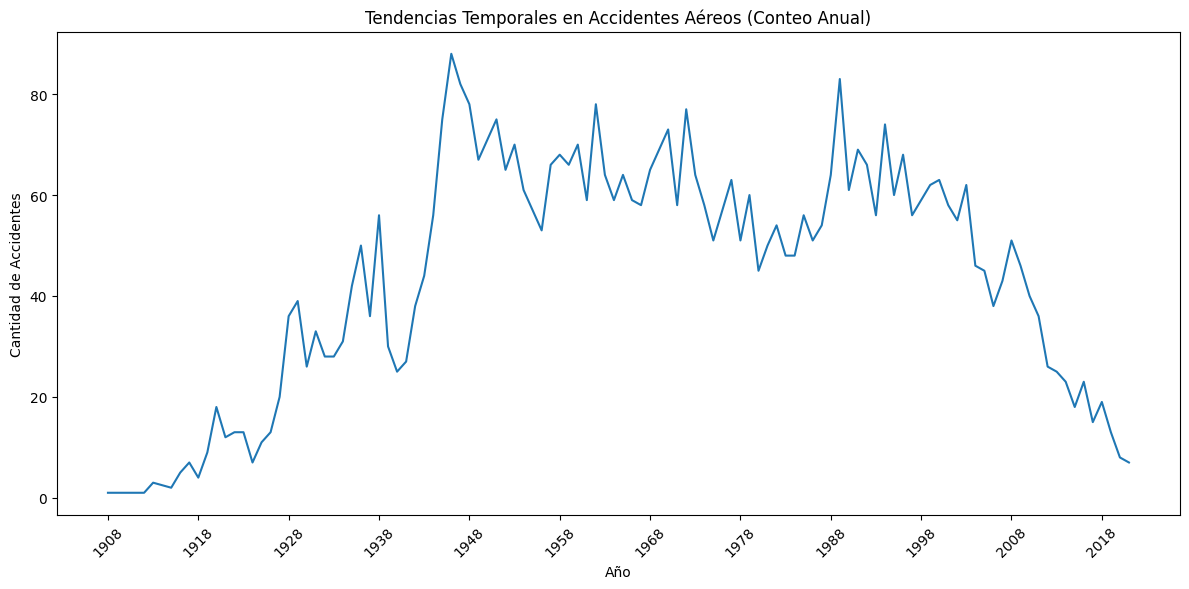

In [11]:

# Agrupa los datos por año y mes y cuenta el número de accidentes en cada grupo
tendencias_temporales = df_accidentes.groupby([df_accidentes['Año'], df_accidentes['Mes']]).size().reset_index(name='Cantidad de Accidentes')
tendencias_temporales.rename(columns={'Fecha': 'Año', 'Fecha.1': 'Mes'}, inplace=True)

# Agrupa los datos por año y suma el número de accidentes en cada año
tendencias_anuales = tendencias_temporales.groupby('Año')['Cantidad de Accidentes'].sum().reset_index()

# Crea un gráfico de línea para mostrar las tendencias temporales por año
plt.figure(figsize=(12, 6))
sns.lineplot(data=tendencias_anuales, x='Año', y='Cantidad de Accidentes', palette='viridis', markers=True, dashes=False)
plt.title('Tendencias Temporales en Accidentes Aéreos (Conteo Anual)')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(ticks=range(tendencias_anuales['Año'].min(), tendencias_anuales['Año'].max() + 1, 10), rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_13940\2159833709.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=tendencias_temporales, x='Año', y='Cantidad de Accidentes', palette='viridis')


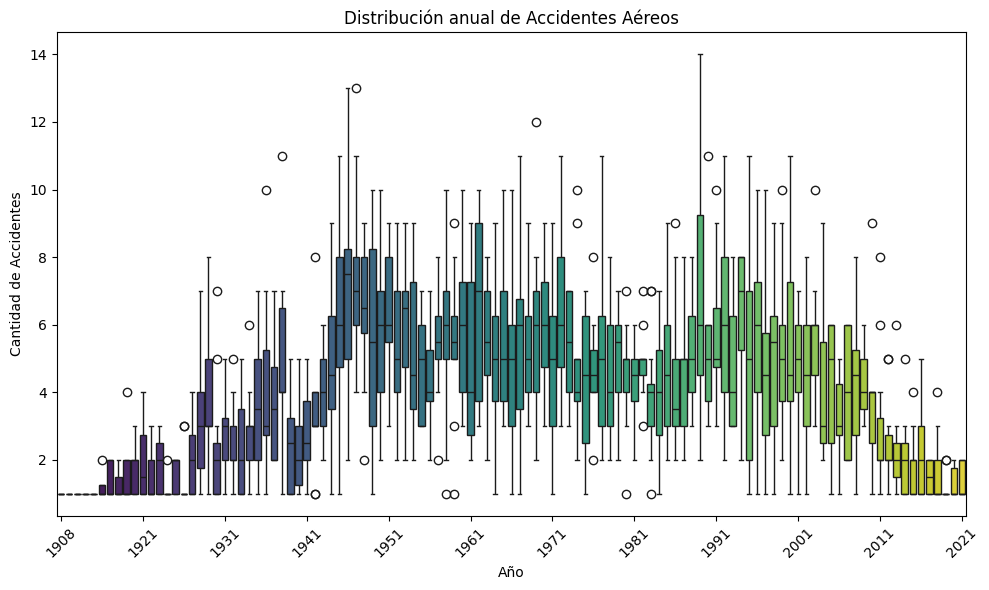

In [12]:
import matplotlib.ticker as ticker


# Utiliza un gráfico de caja (boxplot) para examinar la distribución de accidentes por mes
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=tendencias_temporales, x='Año', y='Cantidad de Accidentes', palette='viridis')
plt.title('Distribución anual de Accidentes Aéreos')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)

# Establece los intervalos de ticks en el eje x (de 10 en 10 años)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))

plt.tight_layout()
plt.show()

Código para Examinar Estacionalidades y Patrones Recurrentes:

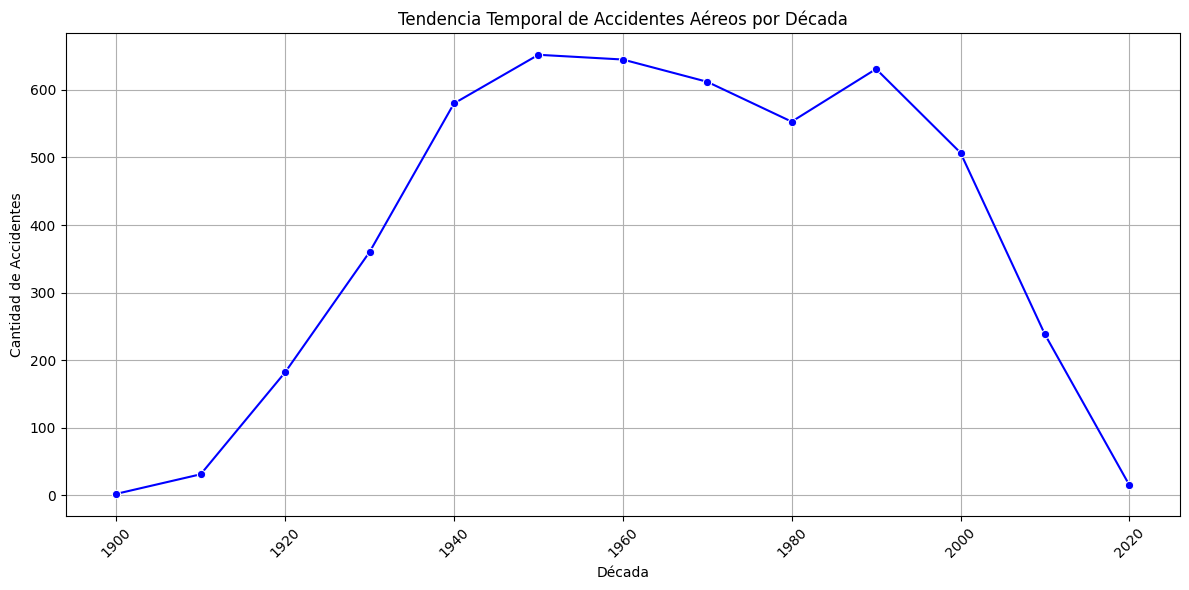

In [13]:

# Agrupa los datos por década y cuenta el número de accidentes en cada grupo
tendencias_temporales = df_accidentes.groupby(df_accidentes['Año'] // 10 * 10).size().reset_index(name='Cantidad de Accidentes')
tendencias_temporales.rename(columns={'Año': 'Década'}, inplace=True)

# Crea un gráfico de línea para mostrar la tendencia temporal de accidentes por década
plt.figure(figsize=(12, 6))
sns.lineplot(data=tendencias_temporales, x='Década', y='Cantidad de Accidentes', marker='o', color='b')
plt.title('Tendencia Temporal de Accidentes Aéreos por Década')
plt.xlabel('Década')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)  # Agregar líneas de cuadrícula opcionalmente
plt.show()

Accidentes por Estaciones del Año

Estación
Invierno     1316
Otoño        1317
Primavera    1133
Verano       1242
Name: Estación, dtype: int64

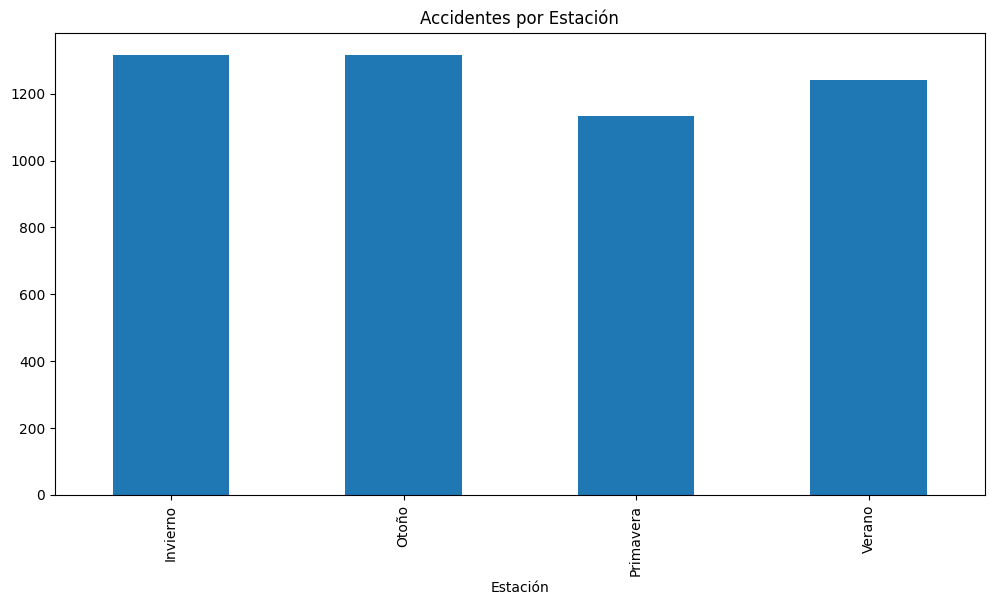

In [39]:
def obtener_estaciones(Mes):
    if Mes >= 3 and Mes <= 5:
        return 'Primavera'
    elif Mes >= 6 and Mes <= 8:
        return 'Verano'
    elif Mes >= 9 and Mes <= 11:
        return 'Otoño'
    else:
        return 'Invierno'

df_accidentes['Estación'] = df_accidentes['Mes'].apply(obtener_estaciones)

crashed_by_season = df_accidentes['Estación'].groupby(df_accidentes['Estación']).count()
crashed_by_season.plot(kind='bar', figsize=[12, 6], title='Accidentes por Estación')
crashed_by_season

Día más desafortunado del año

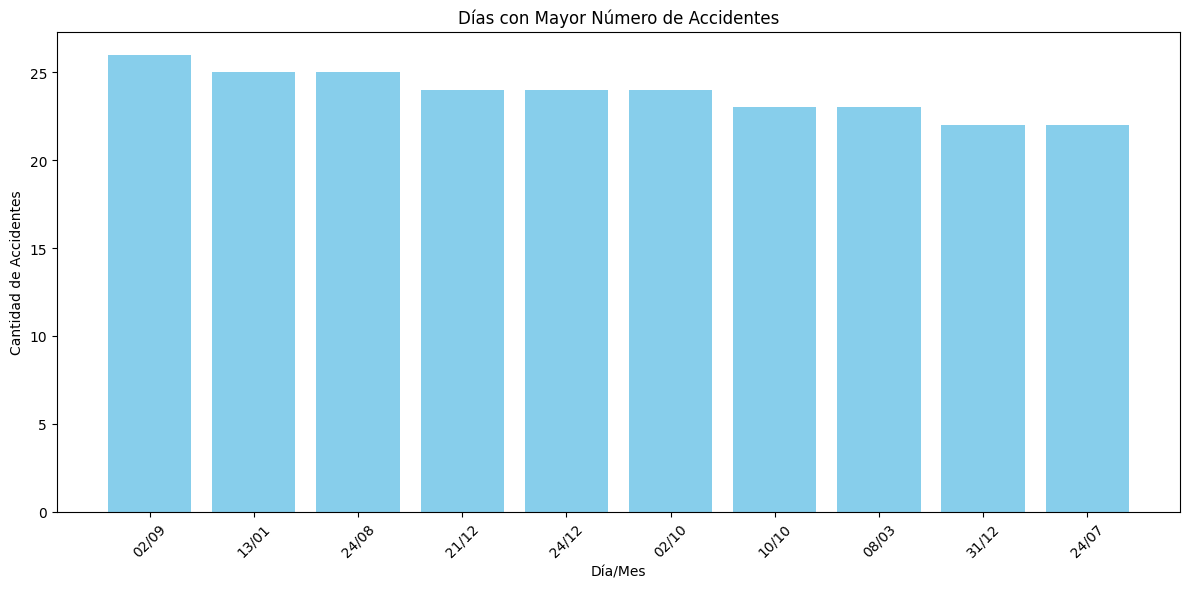

In [53]:

# Ordenar el DataFrame por la cantidad de accidentes de forma descendente
accidentes_por_dia_mes = accidentes_por_dia_mes.sort_values(by='Cantidad de Accidentes', ascending=False)

# Tomar los primeros n días con más accidentes que deseas mostrar en el gráfico
n = 10  # Puedes ajustar este valor según tus preferencias
top_dias = accidentes_por_dia_mes.head(n)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_dias['Día_Mes'], top_dias['Cantidad de Accidentes'], color='skyblue')
plt.title('Días con Mayor Número de Accidentes')
plt.xlabel('Día/Mes')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

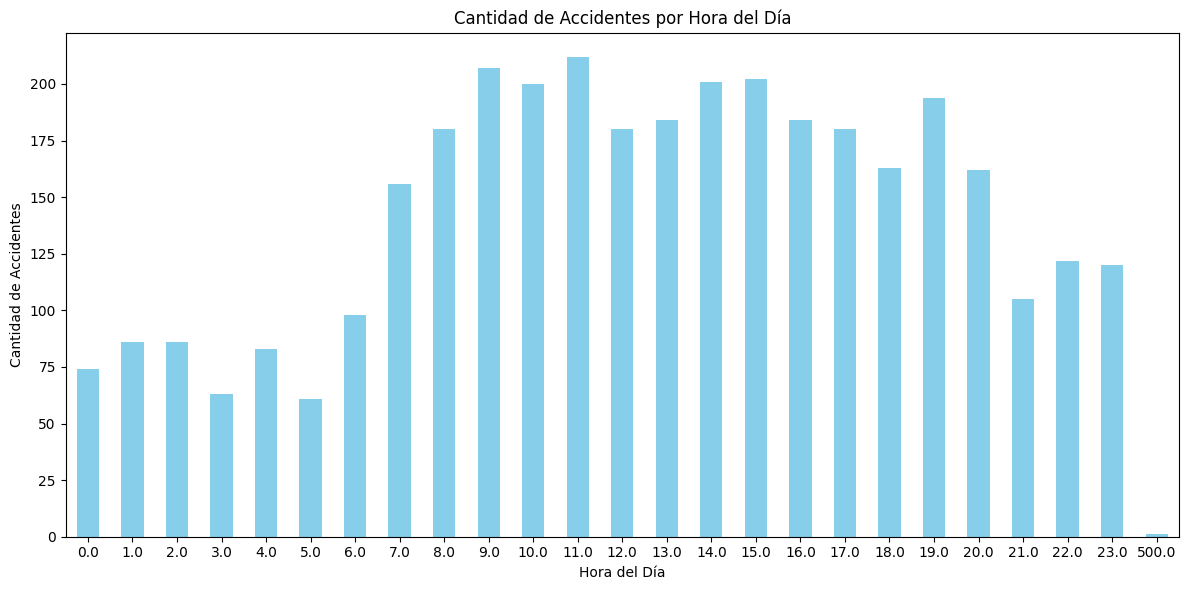

In [14]:
# Crea una copia del DataFrame original para evitar cambios permanentes
df_filtered = df_accidentes.copy()

# Filtra las filas con valores no nulos en la columna "Hora Declarada"
df_filtered = df_filtered.dropna(subset=['Hora Declarada'])

# Limpia los valores de la columna "Hora Declarada" y extrae la hora
df_filtered['Hora'] = df_filtered['Hora Declarada'].str.extract('(\d+)').astype(float)

# Cuenta la cantidad de accidentes por hora
accidentes_por_hora = df_filtered['Hora'].value_counts().sort_index()

# Crea un gráfico de barras para mostrar la cantidad de accidentes por hora
plt.figure(figsize=(12, 6))
accidentes_por_hora.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Accidentes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Tasa de sobrevivencia anual

Resultado inconclusivo

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_13940\4195965001.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Total a Bordo'] = pd.to_numeric(df_filtered['Total a Bordo'], errors='coerce')
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_13940\4195965001.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Total de Fatalidades'] = pd.to_numeric(df_filtered['Total de Fatalidades'], errors='coerce')
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_13940\4195965001.py:7: SettingWithC

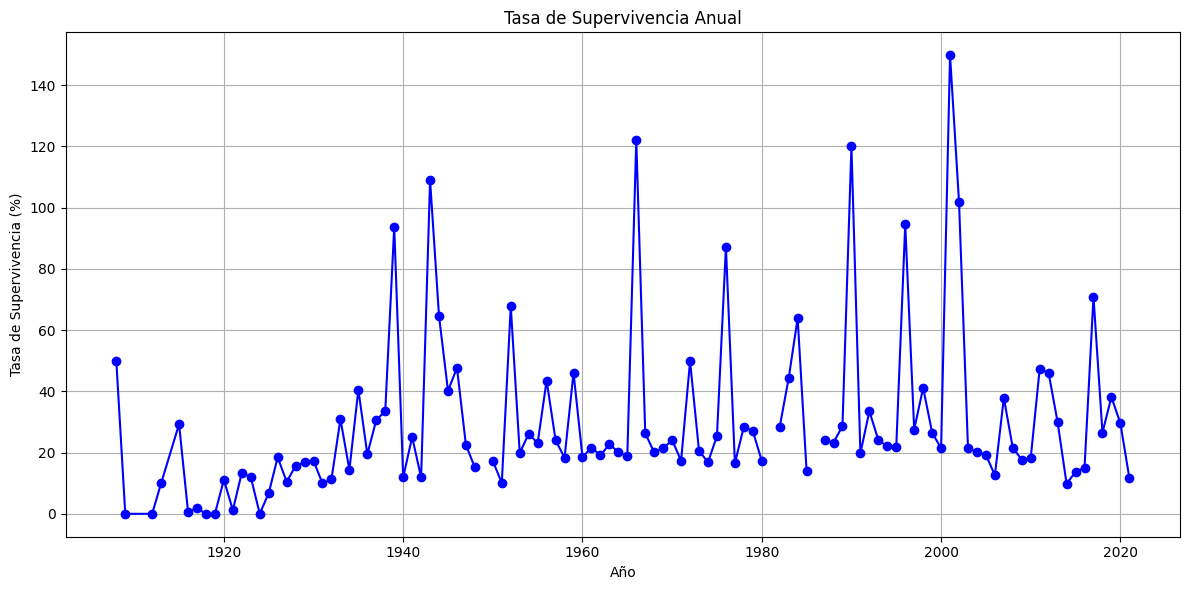

In [33]:

# Filtrar filas con valores no nulos en las columnas relevantes
df_filtered = df_accidentes.dropna(subset=['Total a Bordo', 'Total de Fatalidades', 'Año', 'Fatalidades en Solo'])

# Convertir las columnas a tipo numérico, manejando errores de conversión
df_filtered['Total a Bordo'] = pd.to_numeric(df_filtered['Total a Bordo'], errors='coerce')
df_filtered['Total de Fatalidades'] = pd.to_numeric(df_filtered['Total de Fatalidades'], errors='coerce')
df_filtered['Fatalidades en Solo'] = pd.to_numeric(df_filtered['Fatalidades en Solo'], errors='coerce')

# Calcular la tasa de supervivencia anual
df_filtered['Tasa de Supervivencia'] = ((df_filtered['Total a Bordo'] - (df_filtered['Total de Fatalidades'] - df_filtered['Fatalidades en Solo'])) / df_filtered['Total a Bordo']) * 100

# Agrupar por año y calcular el promedio de la tasa de supervivencia
tasa_supervivencia_anual = df_filtered.groupby('Año')['Tasa de Supervivencia'].mean().reset_index()

# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(tasa_supervivencia_anual['Año'], tasa_supervivencia_anual['Tasa de Supervivencia'], marker='o', linestyle='-', color='b')
plt.title('Tasa de Supervivencia Anual')
plt.xlabel('Año')
plt.ylabel('Tasa de Supervivencia (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

Análise de Causas: Word Cloud

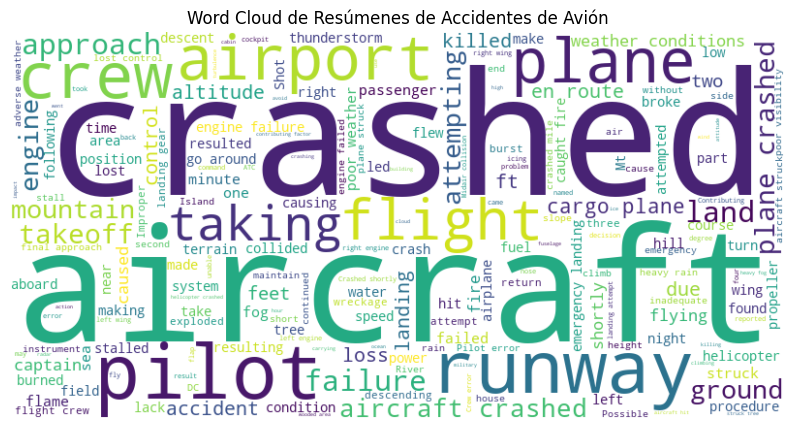

In [15]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear una copia del DataFrame
df_copy = df_accidentes.copy()

# Combinar todos los resúmenes en un solo texto
resumenes_texto = ' '.join(df_copy['Resumen'].dropna())

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(resumenes_texto)

# Mostrar la Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Resúmenes de Accidentes de Avión')
plt.show()


Análisis de palabras clave

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leonardo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Leonardo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


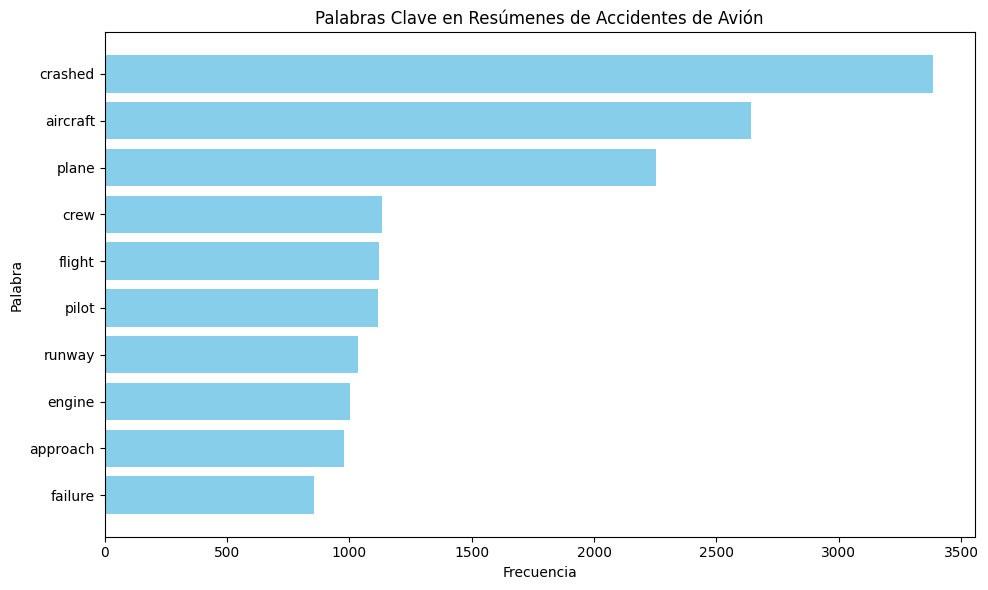

In [16]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Descarga las stopwords (palabras comunes que se pueden ignorar)
nltk.download('stopwords')
nltk.download('punkt')

# Cargar el DataFrame
df_copy = df_accidentes.copy()

# Combinar todos los resúmenes en un solo texto
resumenes_texto = ' '.join(df_copy['Resumen'].dropna())

# Tokenización: dividir el texto en palabras individuales
palabras = nltk.word_tokenize(resumenes_texto)

# Eliminar las stopwords (palabras comunes como "el", "la", "de" que no aportan información)
stop_words = set(stopwords.words('English'))  # Puedes ajustar el idioma si es necesario
palabras_filtradas = [word.lower() for word in palabras if word.isalnum() and word.lower() not in stop_words]

# Contar la frecuencia de cada palabra
frecuencia_palabras = Counter(palabras_filtradas)

# Obtener las 10 palabras más frecuentes
palabras_mas_frecuentes = frecuencia_palabras.most_common(10)

# Crear un DataFrame para visualización
df_palabras_mas_frecuentes = pd.DataFrame(palabras_mas_frecuentes, columns=['Palabra', 'Frecuencia'])

# Visualizar las palabras clave
plt.figure(figsize=(10, 6))
plt.barh(df_palabras_mas_frecuentes['Palabra'], df_palabras_mas_frecuentes['Frecuencia'], color='skyblue')
plt.title('Palabras Clave en Resúmenes de Accidentes de Avión')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la palabra más frecuente en la parte superior
plt.tight_layout()
plt.show()


Frases más comunes para describir los accidentes

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leonardo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


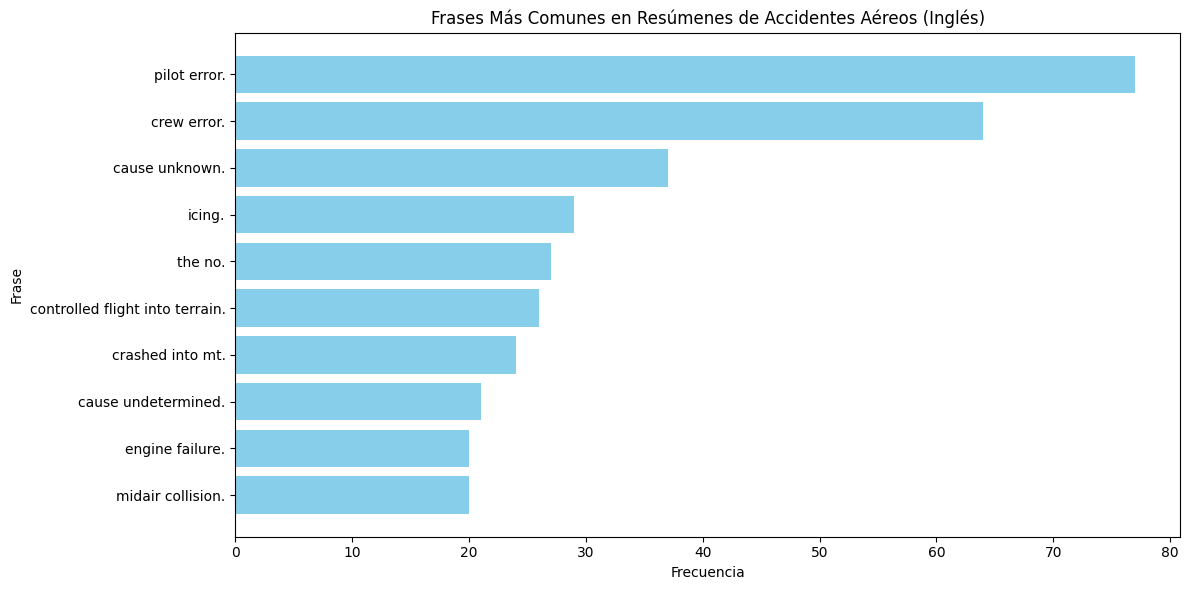

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize  # Utilizamos sent_tokenize para dividir el texto en frases

# Descargar las stopwords en inglés si aún no lo has hecho
nltk.download('stopwords')

# Supongamos que tienes un DataFrame llamado df_accidentes con una columna "Resumen"
# Asegúrate de que df_accidentes tenga datos válidos en la columna "Resumen"

# Filtrar filas con valores no nulos en la columna "Resumen"
df_accidentes = df_accidentes.dropna(subset=['Resumen'])

# Preprocesamiento de texto
df_accidentes['Resumen'] = df_accidentes['Resumen'].str.lower()

# Tokenización: dividir el texto en frases en lugar de palabras
frases = [frase for texto in df_accidentes['Resumen'] for frase in sent_tokenize(texto)]

# Eliminar las stopwords (palabras comunes en inglés que no aportan información)
stop_words = set(stopwords.words('english'))

# Obtener las N frases más comunes
N = 10  # Puedes ajustar este valor según la cantidad de frases que desees mostrar
frases_comunes = Counter(frases).most_common(N)

# Crear un DataFrame con las frases y sus frecuencias
df_frases_comunes = pd.DataFrame(frases_comunes, columns=['Frase', 'Frecuencia'])

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(df_frases_comunes['Frase'], df_frases_comunes['Frecuencia'], color='skyblue')
plt.title('Frases Más Comunes en Resúmenes de Accidentes Aéreos (Inglés)')
plt.xlabel('Frecuencia')
plt.ylabel('Frase')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la frase más común en la parte superior
plt.tight_layout()
plt.show()


Modelos de Aeronaves con más casos de accidentes

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_13940\1111156191.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad de Accidentes', y='Tipo de Aeronave', data=conteo_tipos_aeronave.head(10), palette='viridis')


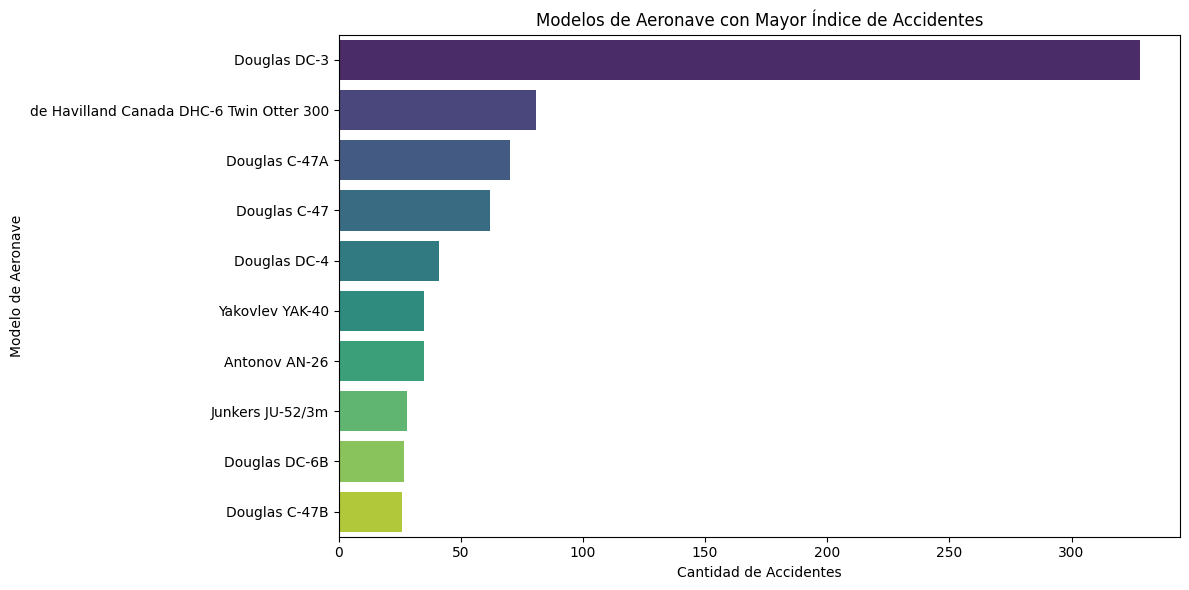

In [60]:
conteo_tipos_aeronave = df_accidentes['Tipo de Aeronave'].value_counts().reset_index()
conteo_tipos_aeronave.columns = ['Tipo de Aeronave', 'Cantidad de Accidentes']
conteo_tipos_aeronave = conteo_tipos_aeronave.sort_values(by='Cantidad de Accidentes', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Cantidad de Accidentes', y='Tipo de Aeronave', data=conteo_tipos_aeronave.head(10), palette='viridis')
plt.title('Modelos de Aeronave con Mayor Índice de Accidentes')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Modelo de Aeronave')
plt.tight_layout()
plt.show()


Modelos de Aeronaves con más casos de accidentes

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_13940\3148185860.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad de Accidentes', y='Operadora', data=conteo_operadoras.head(10), palette='viridis')


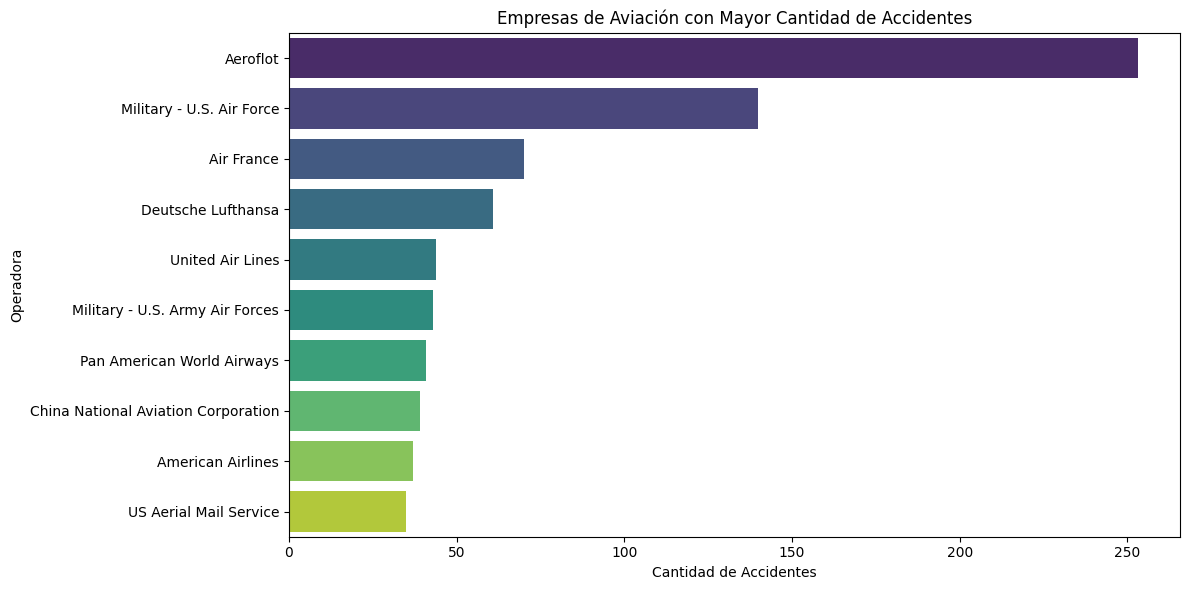

In [61]:

# Contar la cantidad de accidentes por operadora y ordenarlos en orden descendente
conteo_operadoras = df_accidentes['Operadora'].value_counts().reset_index()
conteo_operadoras.columns = ['Operadora', 'Cantidad de Accidentes']
conteo_operadoras = conteo_operadoras.sort_values(by='Cantidad de Accidentes', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Cantidad de Accidentes', y='Operadora', data=conteo_operadoras.head(10), palette='viridis')
plt.title('Empresas de Aviación con Mayor Cantidad de Accidentes')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Operadora')
plt.tight_layout()
plt.show()

Cálculo de frecuencia de cada ruta

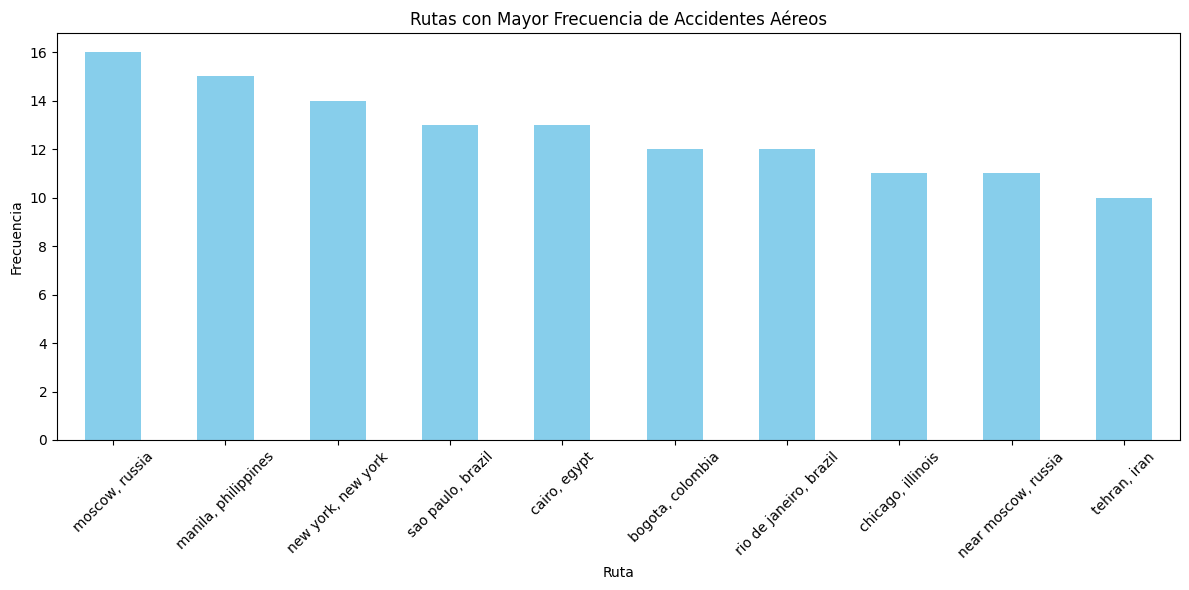

In [20]:

frecuencia_rutas = df_accidentes['Ruta'].value_counts()

# Selecciona las rutas con mayor frecuencia (por ejemplo, las 10 primeras)
top_rutas = frecuencia_rutas.head(10)

# Crea un gráfico de barras para visualizar las rutas con mayor frecuencia
plt.figure(figsize=(12, 6))
top_rutas.plot(kind='bar', color='skyblue')
plt.title('Rutas con Mayor Frecuencia de Accidentes Aéreos')
plt.xlabel('Ruta')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()